In [1]:
import pandas as pd

In [7]:
#Read csv file

In [43]:
df = pd.read_csv('QueryResults.csv', names = ['DATE', 'TAG', 'POSTS'], header = 0)

In [44]:
#Examine the first five rows

In [45]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


In [13]:
#Examine the last five rows

In [46]:
df.tail()

,DATE,TAG,POSTS
1986,2020-07-01 00:00:00,r,5694
1987,2020-07-01 00:00:00,go,743
1988,2020-07-01 00:00:00,ruby,775
1989,2020-07-01 00:00:00,perl,182
1990,2020-07-01 00:00:00,swift,3607


In [15]:
#Check how many rows and columns there are

In [48]:
df.shape

(1991, 3)

In [21]:
#Calculate the total number of post per language

In [56]:
groupby_df = df.groupby('TAG')

In [63]:
groupby_df.sum()

/var/folders/rs/r12vb6w13sn_stq5_nmy6_n00000gn/T/ipykernel_20159/2885154078.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  groupby_df.sum()


,POSTS
TAG,
assembly,34852
c,336042
c#,1423530
c++,684210
delphi,46212
go,47499
java,1696403
javascript,2056510
perl,65286


In [34]:
#Find out which Programming language has had the highest total number of posts of all time

In [64]:
groupby_df.sum().max()

/var/folders/rs/r12vb6w13sn_stq5_nmy6_n00000gn/T/ipykernel_20159/3582163937.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  groupby_df.sum().max()


POSTS    2056510
dtype: int64

In [65]:
groupby_df.sum().idxmax()

/var/folders/rs/r12vb6w13sn_stq5_nmy6_n00000gn/T/ipykernel_20159/1714587130.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  groupby_df.sum().idxmax()


POSTS    javascript
dtype: object

In [42]:
#How many months of data exist per language? Which language had the fewest months with an entry?

In [67]:
df.groupby('TAG').count()

,DATE,POSTS
TAG,,
assembly,144,144
c,144,144
c#,145,145
c++,144,144
delphi,144,144
go,129,129
java,144,144
javascript,144,144
perl,144,144


In [69]:
df.groupby('TAG').count().idxmin()

DATE     go
POSTS    go
dtype: object

In [70]:
df.DATE[1]

'2008-08-01 00:00:00'

In [71]:
df.DATE

0       2008-07-01 00:00:00
1       2008-08-01 00:00:00
2       2008-08-01 00:00:00
3       2008-08-01 00:00:00
4       2008-08-01 00:00:00
               ...         
1986    2020-07-01 00:00:00
1987    2020-07-01 00:00:00
1988    2020-07-01 00:00:00
1989    2020-07-01 00:00:00
1990    2020-07-01 00:00:00
Name: DATE, Length: 1991, dtype: object

In [72]:
type(df['DATE'][1])

str

In [73]:
type(pd.to_datetime(df.DATE[1]))

pandas._libs.tslibs.timestamps.Timestamp

In [74]:
df.DATE = pd.to_datetime(df.DATE)

In [75]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124


In [76]:
#Use pivot 

In [84]:
reshaped_df = df.pivot(index="DATE", columns="TAG", values="POSTS")

In [85]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN


In [81]:
reshaped_df.shape

(145, 14)

In [82]:
reshaped_df.tail()

POSTS                                                  \
TAG        assembly       c       c#     c++ delphi     go     java   
DATE                                                                  
2020-03-01    317.0  2670.0   8954.0  5107.0  181.0  719.0  13253.0   
2020-04-01    406.0  3472.0  10042.0  6820.0  250.0  887.0  15377.0   
2020-05-01    386.0  3602.0   9923.0  7063.0  221.0  826.0  14711.0   
2020-06-01    363.0  2757.0   9064.0  6161.0  214.0  765.0  13015.0   
2020-07-01    298.0  2294.0   9145.0  5756.0  212.0  743.0  12723.0   

                                                                      
TAG        javascript   perl     php   python       r   ruby   swift  
DATE                                                                  
2020-03-01    20483.0  215.0  6672.0  26673.0  5761.0  780.0  3434.0  
2020-04-01    24634.0  240.0  8060.0  32605.0  7047.0  860.0  4015.0  
2020-05-01    25196.0  228.0  7917.0  34478.0  6833.0  774.0  4066.0  
2020-06-01    23360.0  203.0  7188.0  31817.0  6249.0  670.0  3733.0  
2020-07-01    23802.0  182.0  7334.0  31261.0  5694.0  775.0  3607.0

In [83]:
reshaped_df.columns

MultiIndex([('POSTS',   'assembly'),
            ('POSTS',          'c'),
            ('POSTS',         'c#'),
            ('POSTS',        'c++'),
            ('POSTS',     'delphi'),
            ('POSTS',         'go'),
            ('POSTS',       'java'),
            ('POSTS', 'javascript'),
            ('POSTS',       'perl'),
            ('POSTS',        'php'),
            ('POSTS',     'python'),
            ('POSTS',          'r'),
            ('POSTS',       'ruby'),
            ('POSTS',      'swift')],
           names=[None, 'TAG'])

In [86]:
reshaped_df.count()

TAG
assembly      144
c             144
c#            145
c++           144
delphi        144
go            129
java          144
javascript    144
perl          144
php           144
python        144
r             142
ruby          144
swift         135
dtype: int64

In [87]:
reshaped_df.fillna(0, inplace=True)

In [89]:
reshaped_df.isna().values.any()

False

In [91]:
import matplotlib.pyplot as plt

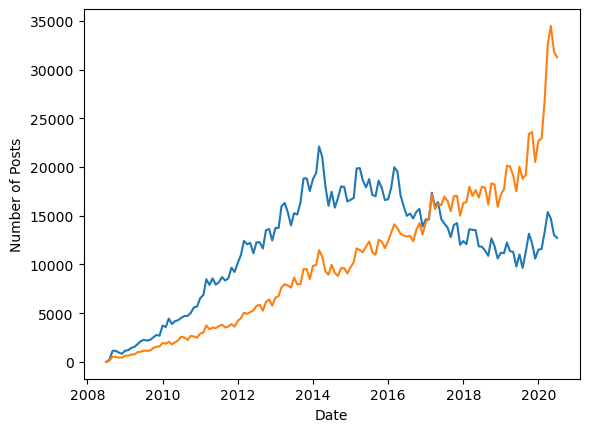

In [96]:
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.plot(reshaped_df.index, reshaped_df.java)
plt.plot(reshaped_df.index, reshaped_df.python)

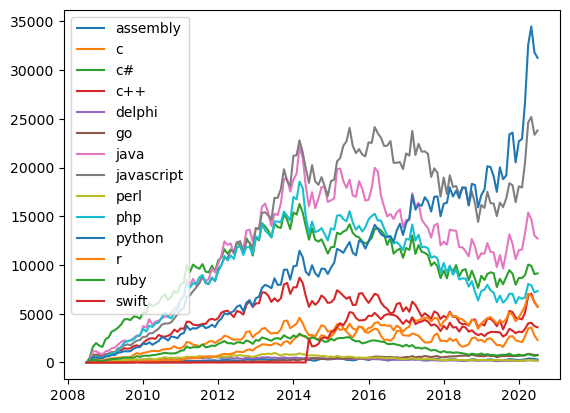

In [100]:
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], label = reshaped_df[column].name)
plt.legend()

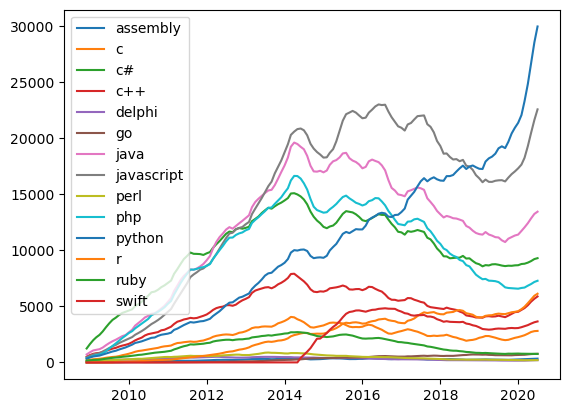

In [101]:
roll_df = reshaped_df.rolling(window=6).mean()
#plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index , roll_df[column], label = roll_df[column].name)
plt.legend()